# LAB 06 - 데이터 간의 관계 시각화 (2)


### #01.준비작업
#### 1-1 패키지 참조

In [1]:
from hossam import load_data
#글꼴을 시스템에 등록
from matplotlib import font_manager as fm
#캔버스 생성, 기본 그래픽 함수 제공
from matplotlib import pyplot as plt
#고급 그래픽 기능 제공
import seaborn as sb



#### 1-2 그래프 초기화

In [2]:
#한글을 지원하는 폰트 파일의 경로
font_path ='./NotoSansKR-Regular.ttf'
#폰트의 그룹을 시스템에 등록
fm.fontManager.addfont(font_path)
#폰트의 속성을 읽어옴
font_prop = fm.FontProperties(fname=font_path)
#읽어온 속성에서 폰트의 이름만 추출
font_name = font_prop.get_name()

#이미지의 선명도를 결정 (1인치 당 픽셀의 수)
my_dpi = 120 
#시스템에 등록된 글꼴 이름  (상단에서 확인한 폰트 이름으로 넣기)
my_font_name = 'Noto Sans KR'
#그림 스타일 지정
my_theme = 'dark'
#seaborn 스타일 (화풍 설정하기)
sb.set_theme(style=my_theme)
#그래프에 한글 폰트 적용
plt.rcParams['font.family']=my_font_name
#기본 폰트 크기
plt.rcParams['font.size'] =16
#그래프에 마이너스 꺠짐 방지 (한글환경에서 필수)
plt.rcParams['axes.unicode_minus']=False

#### 1-3 데이터 가져오기 

In [3]:
origin = load_data('penguins')
origin

[data] https://data.hossam.kr/data/lab06/penguins.xlsx
[desc] 남극 팔머 군도의 펭귄 3종에 대해 신체 치수와 서식지 정보(출처: seaborn 내장 데이터)

field              description
-----------------  -------------
species            팽귄 종
island             서식지
bill_length_mm     부리 길이
bill_depth_mm      부리 두께
flipper_length_mm  날개 길이
body_mass_g        몸무게
sex                성별



,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181,3750,MALE
1,Adelie,Torgersen,39.5,17.4,186,3800,FEMALE
2,Adelie,Torgersen,40.3,18.0,195,3250,FEMALE
3,Adelie,Torgersen,36.7,19.3,193,3450,FEMALE
4,Adelie,Torgersen,39.3,20.6,190,3650,MALE
...,...,...,...,...,...,...,...
329,Gentoo,Biscoe,47.2,13.7,214,4925,FEMALE
330,Gentoo,Biscoe,46.8,14.3,215,4850,FEMALE
331,Gentoo,Biscoe,50.4,15.7,222,5750,MALE
332,Gentoo,Biscoe,45.2,14.8,212,5200,FEMALE


#### 1-4 명목형 변수에 대한 전처리

In [5]:
#기본적으로 불러와진 데이터는 대부분 str 타입
origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   bill_length_mm     334 non-null    float64
 3   bill_depth_mm      334 non-null    float64
 4   flipper_length_mm  334 non-null    int64  
 5   body_mass_g        334 non-null    int64  
 6   sex                333 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 18.4+ KB


In [4]:
#str 타입의 데이터를 명목형으로 변경해준다 (이후 시각화에서 hue 사용이 가능해짐)
df = origin.astype({'species':'category','island':'category','sex':'category'})

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   species            334 non-null    category
 1   island             334 non-null    category
 2   bill_length_mm     334 non-null    float64 
 3   bill_depth_mm      334 non-null    float64 
 4   flipper_length_mm  334 non-null    int64   
 5   body_mass_g        334 non-null    int64   
 6   sex                333 non-null    category
dtypes: category(3), float64(2), int64(2)
memory usage: 11.9 KB


### #02.Reg Plot
- Scatter Plot 과 동일 + 단일 회귀선이 자동으로 추가된다
- 회귀선 주변의 신뢰구간도 함께 표시
- 두 변수 사이의 선형적 관계가 어느 정도인지 직관적으로 해석 가능
- 단일 그래프에서만 사용하며, hue 파라미터는 지원하지 않는다
- 상관성과 기울기를 함께 확인하고자 할 때 사용한다

#### 2-1 부리길이와 부리 두께의 관계
- 전체 데이터로 확인하면 기울기가 음인 회귀선이 확인된다 

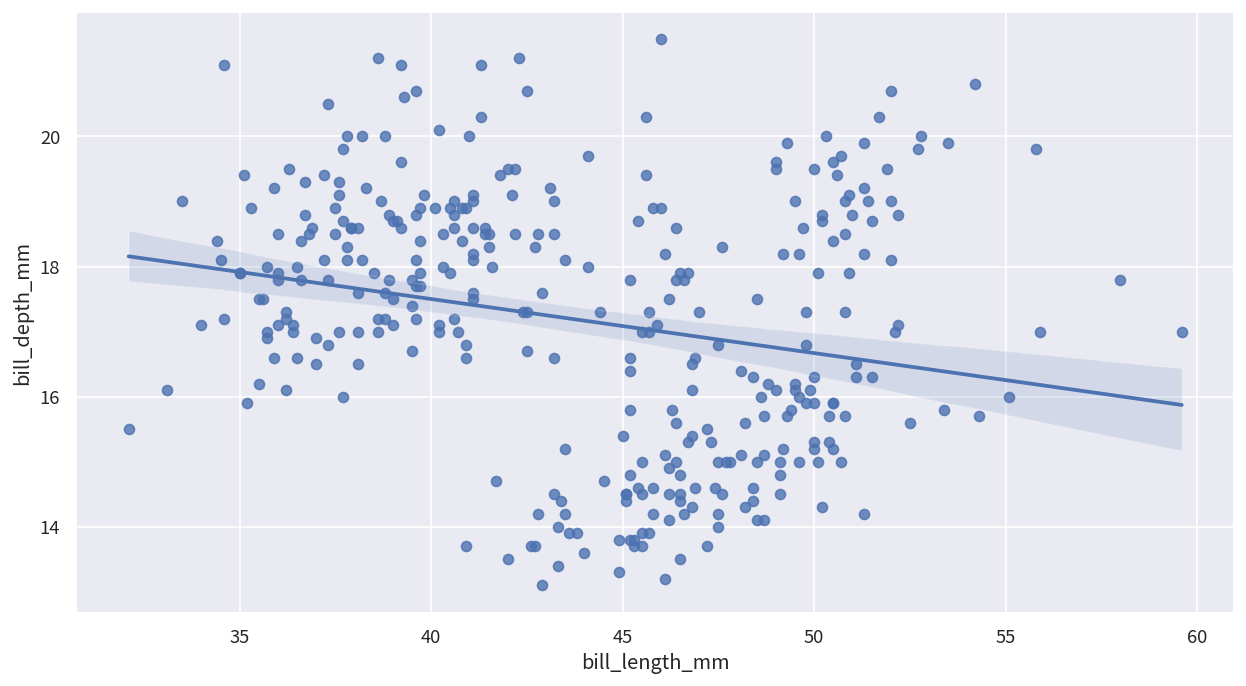

In [6]:
# 1) 그래프 초기화 (캔버스(fig)와 도화지(ax) 준비하기)
width_px = 1280              # 그래프 가로 크기
height_px = 720              # 그래프 세로 크기
rows = 1                     # 그래프 행 수
cols = 1                     # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2) regplot 그리기
# fit_reg = False 파라미터를 추가할 경우 추세선이 표시되지 않는다 (=scatter plot)
#scatter = False 파라미터를 추가하면 산점도가 표시되지 않는다 (=line plot)
# hue 파라미터를 적용할 수 없다

sb.regplot(
    data=origin, x='bill_length_mm', y='bill_depth_mm',
)

# 3) 그래프 꾸미기
ax.grid(True)                          # 배경 격자 표시/숨김


# 4) 출력
plt.tight_layout()                     # 여백 제거
plt.savefig("plot.png", dpi=my_dpi * 2)
plt.show()                             # 그래프 화면 출력
plt.close()                            # 그래프 작업 종료


### #03. LmPlot
- RegPlot 의 기능을 확장한 형태 (scatter plot + reg plot)
- 여러 범주를 기준으로 행열을 나누어 비교가 가능하다
- hue ,row, col 옵션을 통해 그룹간 관계 차이를 시각화 할 수 있다
- 관계 패턴을 다양한 하위 집단으로 세분해 비교할 때 유용하다
- 성별,지역,연도 등 그룹별로 회귀선을 비교하고 싶을 떄 사용한다

#### 3-1 기본 사용 방법
- 산점도 그래프에 추세선을 추가한 형태
- 기본 파라미터는 regplot() 메서드와 동일하다
- hue 파라미터를 지원한다는 점에서 regplot 과 차이를 보인다


> hue 를 통해 species 별로 데이터를 보니 각 군집별로 회귀선이 우상향 하는 기울기가 나왔다 (즉 전체 데이터 일때와 세그먼트를 구분했을 때 나오는 결론이 달랐음)

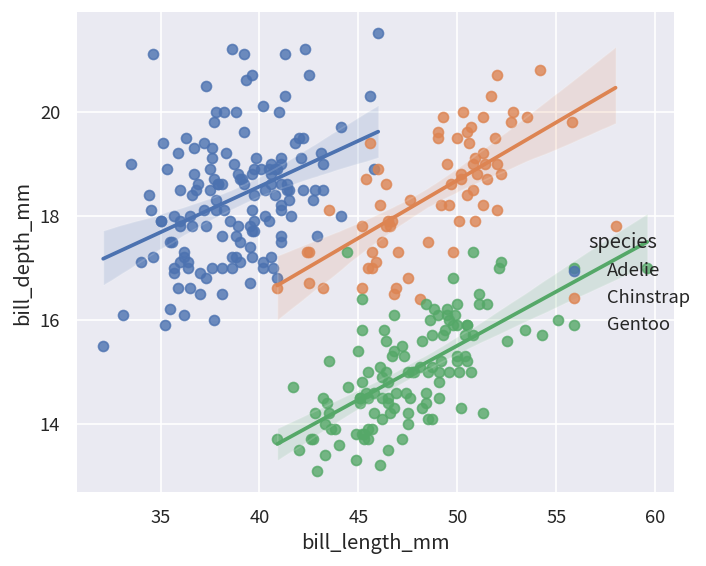

In [9]:
# 1) 그래프 초기화 (캔버스(fig)와 도화지(ax) 준비하기)
width_px = 1280              # 그래프 가로 크기
height_px = 720              # 그래프 세로 크기
figsize = (width_px / my_dpi, height_px / my_dpi)

#아래의 초기화 부분은 생략된다 
#fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2) LM plot 그리기
#그래프를 꾸미기 위해서는 LM PLOT () 메서드로부터 리턴되는 객체 g 를 활용해야 한다

g=sb.lmplot(data=df , x='bill_length_mm', y='bill_depth_mm',hue = 'species')

g.fig.set_dpi(my_dpi)
g.fig.set_figwidth(figsize[0])
g.fig.set_figwidth(figsize[1])
plt.grid()


# 3) 출력
plt.tight_layout()                     # 여백 제거
plt.savefig("plot.png", dpi=my_dpi * 2)
plt.show()                             # 그래프 화면 출력
plt.close()                            # 그래프 작업 종료


#### 3-2 조건별 병렬 시각화
- 범주에 따라 구분한 후 하위 변수를 사용하여 병렬 분할
> 성별 별로 각 군집의 데이털르 시각화 한다

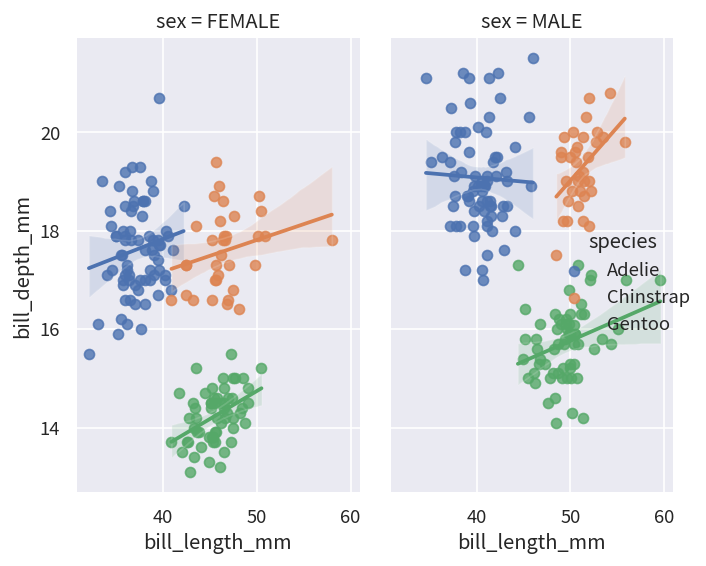

In [12]:
# 1) 그래프 초기화 (캔버스(fig)와 도화지(ax) 준비하기)
width_px = 1280              # 그래프 가로 크기
height_px = 720              # 그래프 세로 크기
figsize = (width_px / my_dpi, height_px / my_dpi)

#아래의 초기화 부분은 생략된다 
#fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2) LM plot 그리기
#그래프를 꾸미기 위해서는 LM PLOT () 메서드로부터 리턴되는 객체 g 를 활용해야 한다

g=sb.lmplot(data=df , x='bill_length_mm', y='bill_depth_mm',hue = 'species' , col='sex')

g.fig.set_dpi(my_dpi)
g.fig.set_figwidth(figsize[0])
g.fig.set_figwidth(figsize[1])

#두개의 그래프가 생성되면 각 그래프에 대해 그리드 설정은 별도로 필요하다
for ax in g.axes.flatten():
  ax.grid(True)




# 3) 출력
plt.tight_layout()                     # 여백 제거
plt.savefig("plot.png", dpi=my_dpi * 2)
plt.show()                             # 그래프 화면 출력
plt.close()                            # 그래프 작업 종료


#### 3-3 모든 조건에 따라 행/열로 분할
- row, col 파라미터를 사용한다

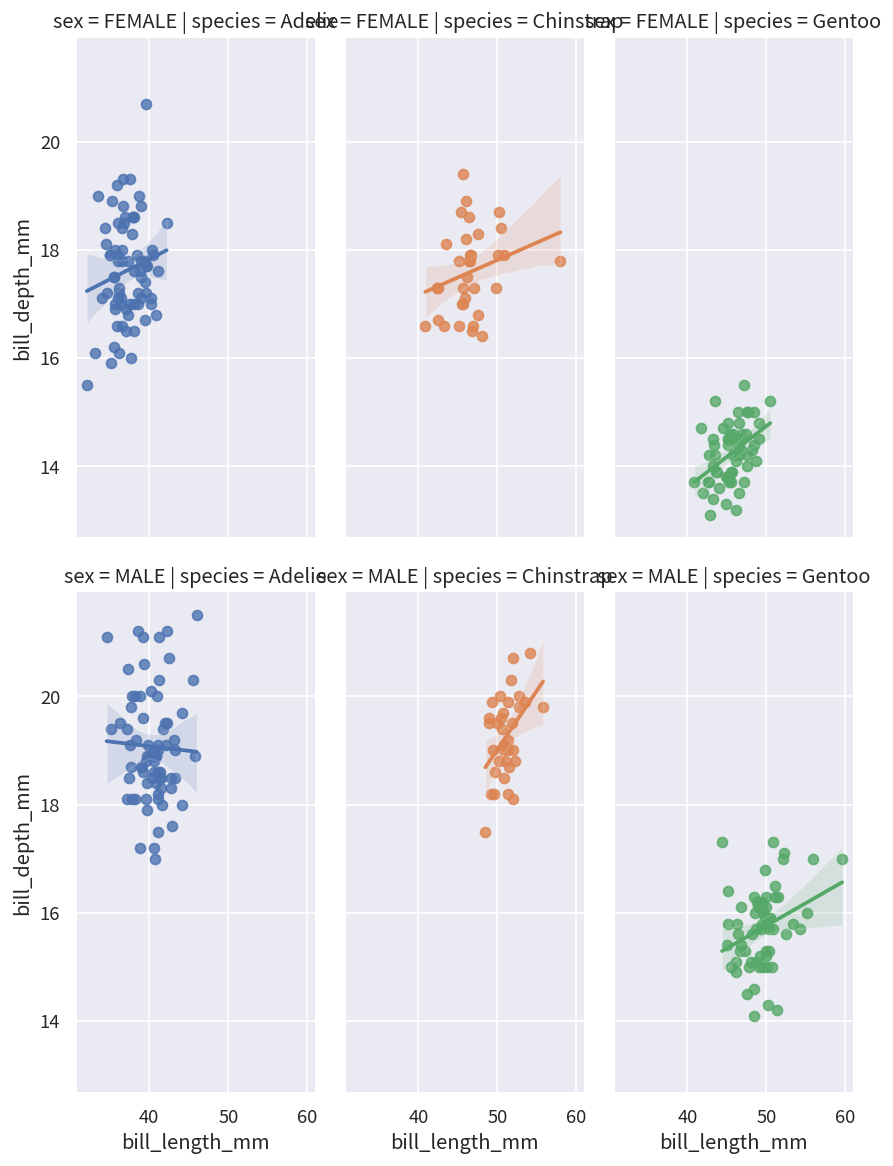

In [14]:
# 1) 그래프 초기화 (캔버스(fig)와 도화지(ax) 준비하기)
width_px = 1800             # 그래프 가로 크기
height_px = 900              # 그래프 세로 크기
figsize = (width_px / my_dpi, height_px / my_dpi)

# 2) LM plot 그리기
g=sb.lmplot(data=df , x='bill_length_mm', y='bill_depth_mm',hue = 'species' , col='species' , row = 'sex' )

g.fig.set_dpi(my_dpi)
g.fig.set_figwidth(figsize[0])
g.fig.set_figwidth(figsize[1])

#두개의 그래프가 생성되면 각 그래프에 대해 그리드 설정은 별도로 필요하다
for ax in g.axes.flatten():
  ax.grid(True)

# 3) 출력
plt.tight_layout()                     # 여백 제거
plt.savefig("plot.png", dpi=my_dpi * 2)
plt.show()                             # 그래프 화면 출력
plt.close()                            # 그래프 작업 종료


### #04. PairPlot (산점도 행)
- 모든 변수에 대한 교차 분석
- 전체 데이터의 구조와 변수 간 상관 관계를 한눈에 파악 가능
- 대각선 도표는 데이터의 주변 분포를 표시하기 위한 일변량 분포 도표 (커널 밀도 곡선) 이나 히스토그램이 그려진다
- 탐색적 데이터 분석에서 초기 전반 스캔용으로 매우 유용
- 다소 처리가 느리다

> 전체 변수들이 서로 어떤 관계를 갖는지 한 번에 파악할 때 유용하게 쓰인다

### 4-1 기본형

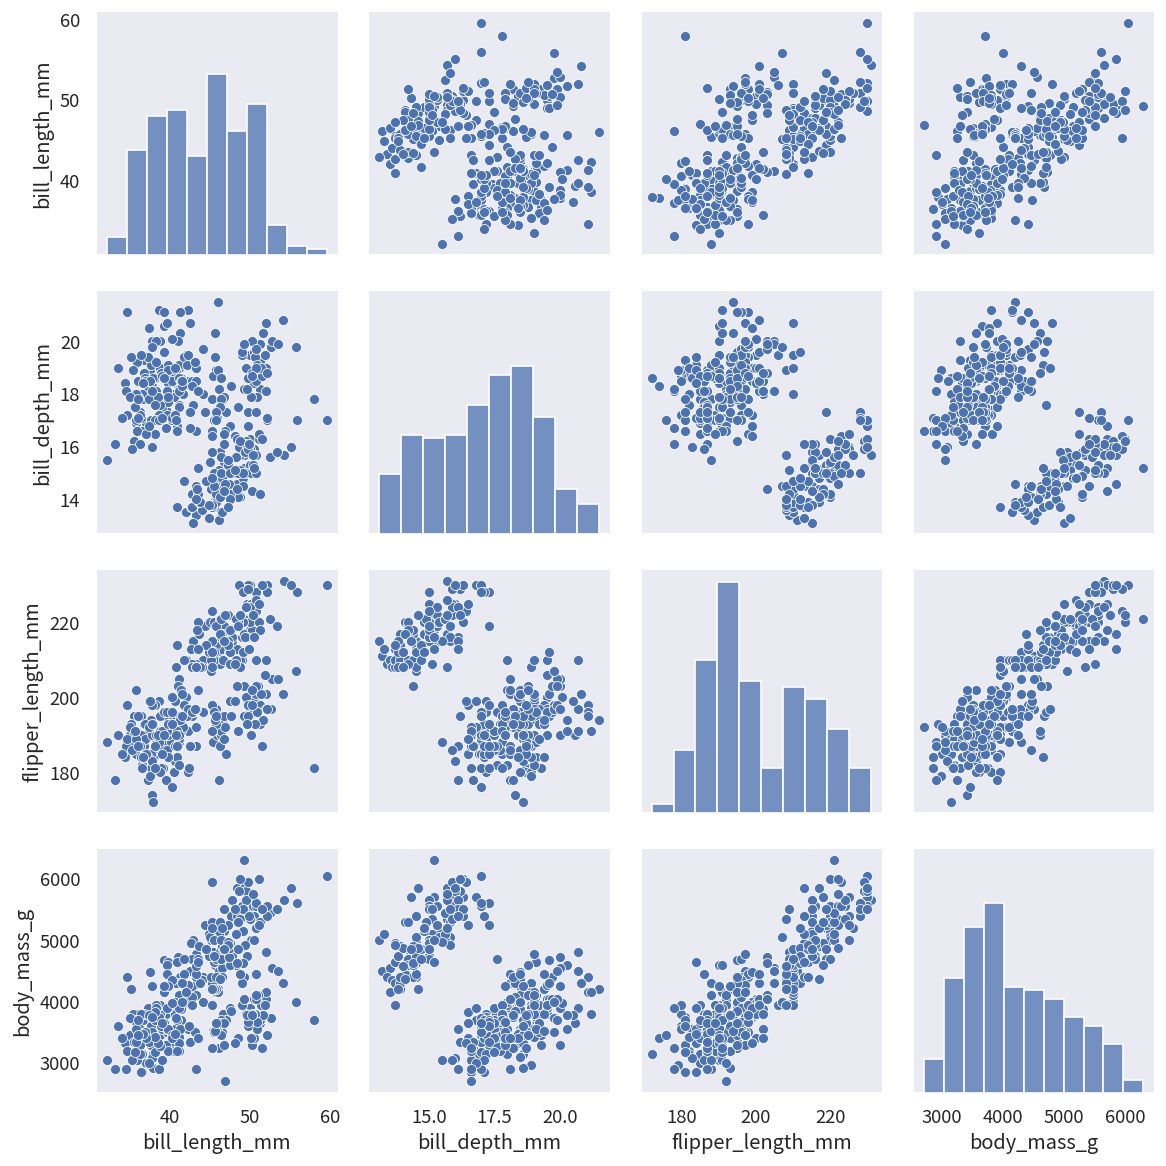

In [15]:
# 1) 그래프 초기화 # 가로 세로 사이즈를 동일하게 맞추는걸 권장한다 
width_px = 1200               # 그래프 가로 크기
height_px = 1200              # 그래프 세로 크기
figsize = (width_px / my_dpi, height_px / my_dpi)

# 2) Pair plot 그리기
# corner = True 파라미터를 추가할 경우 아래쪽 삼각형만 플롯된다

g = sb.pairplot(df)
g.fig.set_dpi(my_dpi)
g.fig.set_figwidth(figsize[0])
g.fig.set_figwidth(figsize[1])


# 3) 출력
plt.tight_layout()                     # 여백 제거
plt.savefig("plot.png", dpi=my_dpi * 2)
plt.show()                             # 그래프 화면 출력
plt.close()                            # 그래프 작업 종료


### 4-2 범주별 구분
- hue 파라미터 적용
- hue 파라미터에 변수를 할당하면 hue 의미론적 매핑이 추가되고, 기본 주변 플롯이 게층화된 커널 밀도 추정 kde 로 변경된다

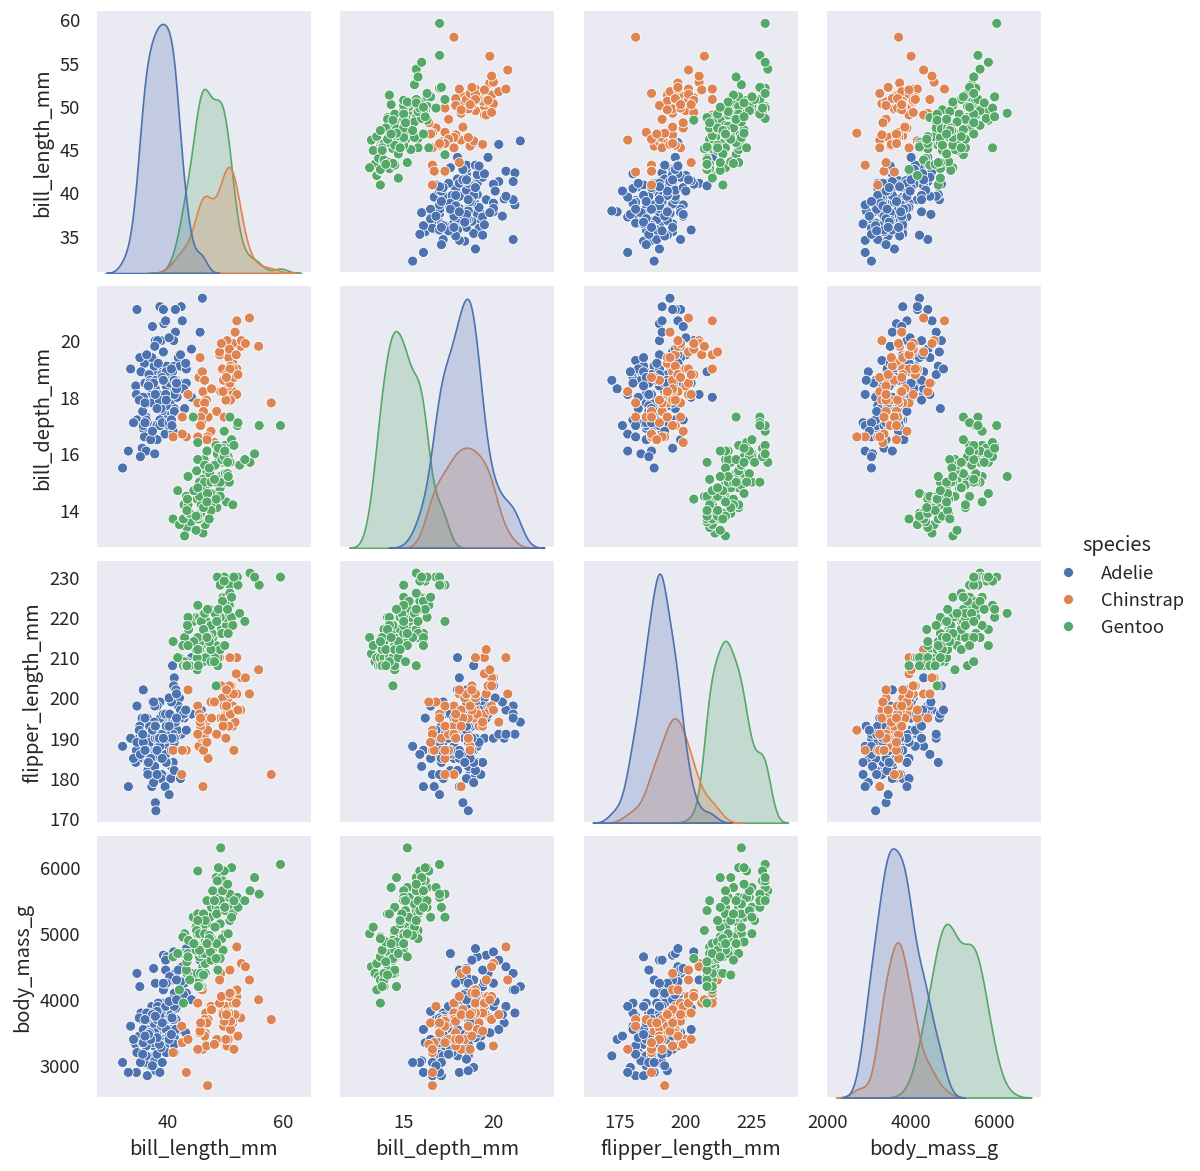

In [16]:
# 1) 그래프 초기화 # 가로 세로 사이즈를 동일하게 맞추는걸 권장한다 
width_px = 1200               # 그래프 가로 크기
height_px = 1200              # 그래프 세로 크기
figsize = (width_px / my_dpi, height_px / my_dpi)

# 2) Pair plot 그리기
# diag_kind 파라미터에 hist 값을 적용한다 > 적용 가능 옵션 auto, hist, kde (기본값)

g = sb.pairplot(df, hue = 'species' , diag_kind = 'kde')
g.fig.set_dpi(my_dpi)
g.fig.set_figwidth(figsize[0])
g.fig.set_figwidth(figsize[1])


# 3) 출력
plt.grid()                     # 여백 제거
plt.show()                             # 그래프 화면 출력
plt.close()                            # 그래프 작업 종료


### 4-3 선택적 변수 적용
 - x vars 파라미터와 y vars 파라미터에 원하는 변수를 리스트 타입으로 지정한다

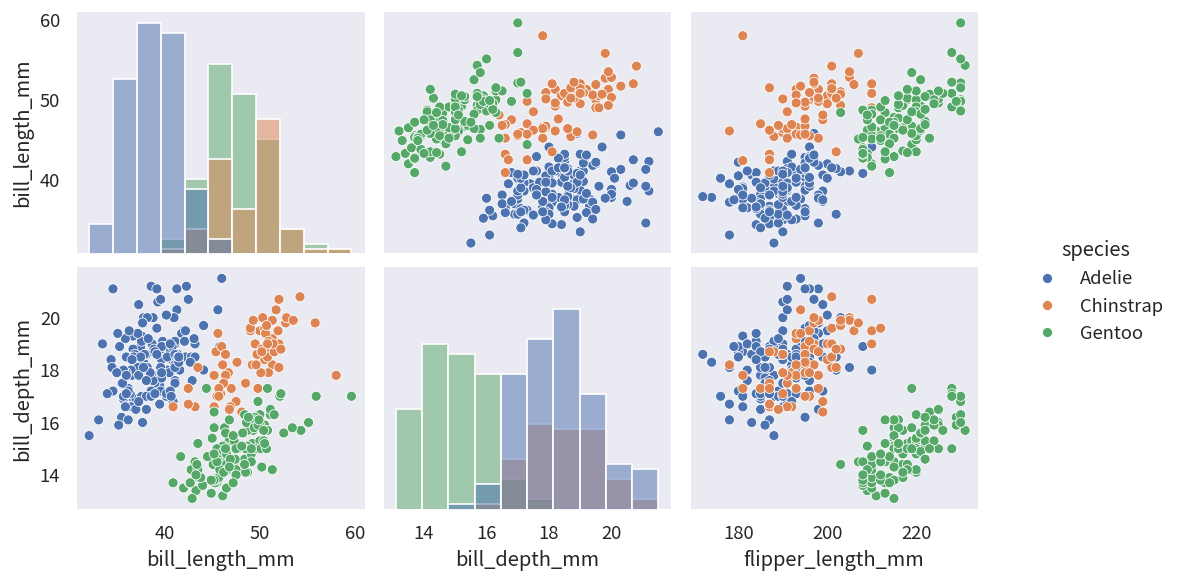

In [19]:
# 1) 그래프 초기화 # 가로 세로 사이즈를 동일하게 맞추는걸 권장한다 
width_px = 1200               # 그래프 가로 크기
height_px = 1200              # 그래프 세로 크기
figsize = (width_px / my_dpi, height_px / my_dpi)

# 2) Pair plot 그리기
# diag_kind 파라미터에 hist 값을 적용한다 > 적용 가능 옵션 auto, hist, kde (기본값)

g = sb.pairplot(df, hue = 'species' , diag_kind = 'hist', x_vars = ['bill_length_mm','bill_depth_mm','flipper_length_mm'] , y_vars =['bill_length_mm','bill_depth_mm'])


g.fig.set_dpi(my_dpi)
g.fig.set_figwidth(figsize[0])
g.fig.set_figwidth(figsize[1])


# 3) 출력
plt.grid()                     # 여백 제거
plt.show()                             # 그래프 화면 출력
plt.close()                            # 그래프 작업 종료


### 4-4 데이터를 그룹별로 묶어서 표시하기
- pairplot() 매서드가 리턴하는 객체를 받아서 map_lower() 메서드를 호출한다
- map_lower() 메서드에 다른 종류의 함수 이름을 적용하면 대각선 기준으로 서로 다른 종류의 시각화 결과물을 표시할 수 있다

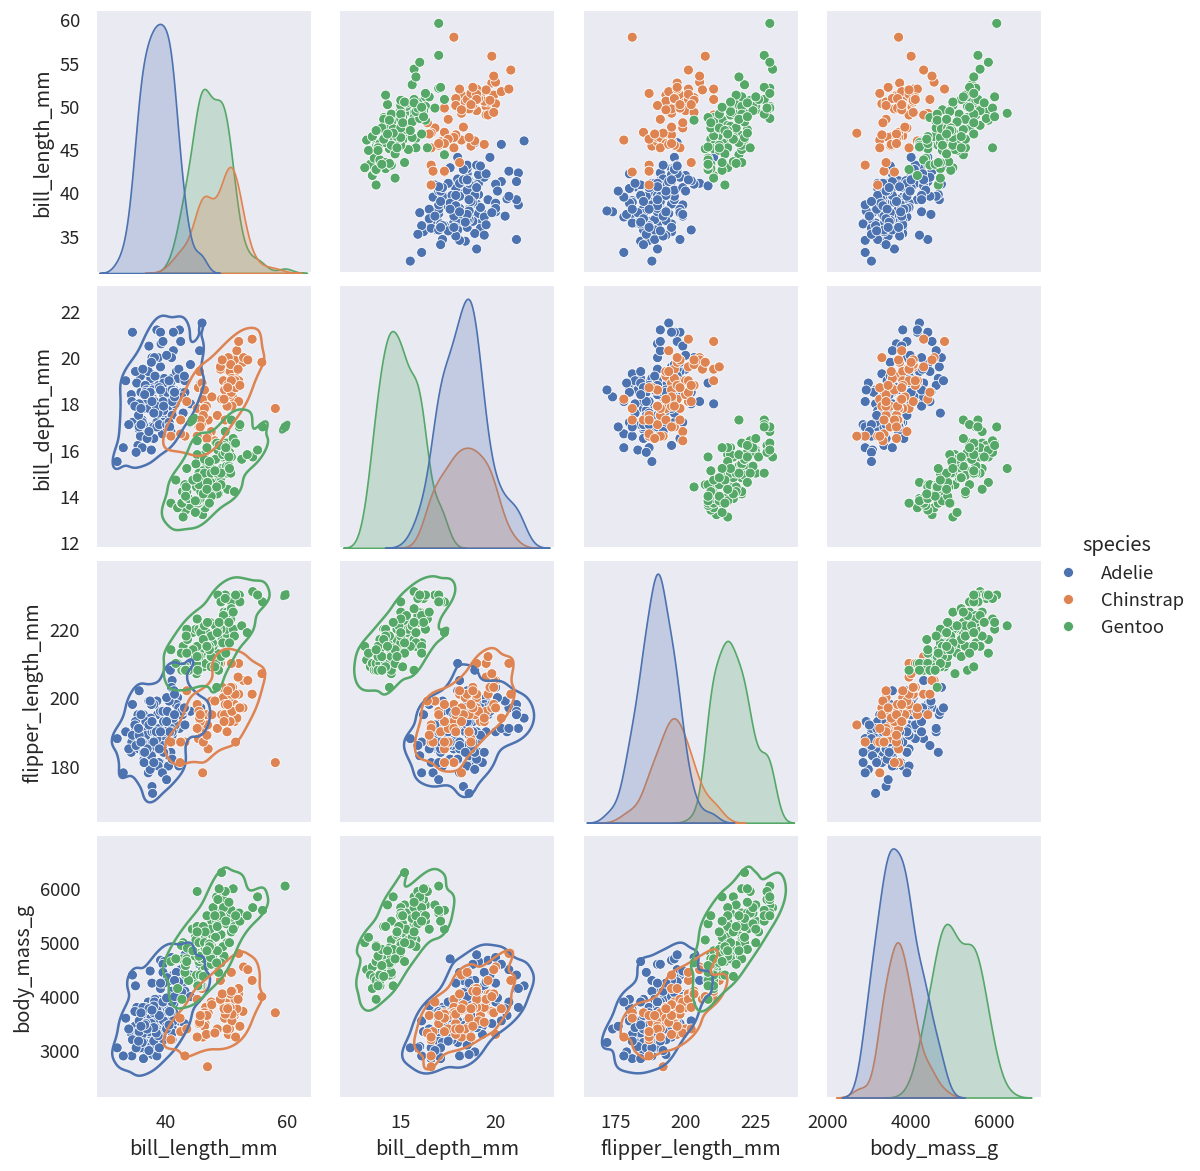

In [20]:
# 1) 그래프 초기화 # 가로 세로 사이즈를 동일하게 맞추는걸 권장한다 
width_px = 1200               # 그래프 가로 크기
height_px = 1200              # 그래프 세로 크기
figsize = (width_px / my_dpi, height_px / my_dpi)

# 2) Pair plot 그리기

g = sb.pairplot(df, hue = 'species')
g.map_lower(sb.kdeplot,levels=1,color=0.2)


g.fig.set_dpi(my_dpi)
g.fig.set_figwidth(figsize[0])
g.fig.set_figwidth(figsize[1])


# 3) 출력
plt.grid()                     # 여백 제거
plt.show()                             # 그래프 화면 출력
plt.close()                            # 그래프 작업 종료
